# 제2과목. 데이터 수집 및 분석

## 제1장 데이터 수집과 전처리

### 1. 데이터 수집

In [ ]:
# 컬럼에 오타 수정
import pandas as pd
path = '/content/drive/MyDrive/빅데이터분석기사'
# data = pd.read_csv(path+'/workpython/data.csv', encoding='euc-kr', index_col=0)
# data.rename(columns={'쿠폰사용회수':'쿠폰사용횟수'}, inplace=True)
data.head()
# data.to_csv(path+'/workpython/data.csv')

,성별,연령대,직업,주거지역,쇼핑액,이용만족도,쇼핑1월,쇼핑2월,쇼핑3월,쿠폰사용횟수,쿠폰선호도,품질,가격,서비스,배송,쇼핑만족도,소득
고객번호,,,,,,,,,,,,,,,,,
190105,남자,45-49세,회사원,소도시,195.6,4,76.8,64.8,54.0,3,예,7,7,1,4,4,4300
190106,남자,25-29세,공무원,소도시,116.4,7,44.4,32.4,39.6,6,아니오,7,4,7,7,7,7500
190107,남자,50세 이상,자영업,중도시,183.6,4,66.0,66.0,51.6,5,예,4,4,3,3,6,2900
190108,남자,50세 이상,농어업,소도시,168.0,4,62.4,52.8,52.8,4,아니오,3,3,4,6,5,5300
190109,남자,40-44세,공무원,중도시,169.2,4,63.6,54.0,51.6,5,아니오,6,4,7,4,6,4000


#### (1) 데이터 생성

In [ ]:
# (1) 판다스 모듈을 이용하여 데이터프레임 직접 생성 또는 기존 딕셔너리, 행렬 등 자료를 데이터 프레임으로 변환 / 저장하여 사용함

import pandas as pd

df = pd.DataFrame({'학번' : ['2301', '2302', '2303'],
                   '성명' : ['홍길동', '유관순', '이순신'],
                   '나이' : [None, 27, 30],
                   '영어' : [70, 85, 75],
                   '수학' : [80, 80, None]})
print(df)

# 데이터프레임 인덱스 열을 학번으로 설정
dfnew = df.set_index('학번')
print(dfnew)

# 줄 제일 끝에 커서 두고 sft+alt 누른 상태로 아래방향키 누르면 줄 복사 할 수 있음
student1 = {'학번':'2301', '성명':'홍길동', '나이':27, '영어':70, '수학':75}
student2 = {'학번':'2302', '성명':'유관순', '나이':19, '영어':75, '수학':90}
student3 = {'학번':'2303', '성명':'이순신', '나이':35, '영어':60, '수학':80}

# 딕셔너리를 데이터 프레임으로 병합
student = pd.DataFrame([student1, student2, student3])
print(student)

student = student.set_index('학번')
# student.set_index('학번', inplace=True)
print(student)

     학번   성명    나이  영어    수학
0  2301  홍길동   NaN  70  80.0
1  2302  유관순  27.0  85  80.0
2  2303  이순신  30.0  75   NaN
       성명    나이  영어    수학
학번                       
2301  홍길동   NaN  70  80.0
2302  유관순  27.0  85  80.0
2303  이순신  30.0  75   NaN
     학번   성명  나이  영어  수학
0  2301  홍길동  27  70  75
1  2302  유관순  19  75  90
2  2303  이순신  35  60  80
       성명  나이  영어  수학
학번                   
2301  홍길동  27  70  75
2302  유관순  19  75  90
2303  이순신  35  60  80


In [ ]:
# (2) 개인 컴퓨터에 저장된 data.csv 파일을 읽어오기
# google.colab 모듈의 files 서브모듈의 upload 함수를 이용하면 원하는 파일은 선택해 업로드할 수 있음

from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('./data.csv', encoding='euc-kr')
df.head()

Saving data.csv to data.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### (2) 외부 데이터 불러오기
- 공공데이터 포털
- 국가통계 포털
- 서울 열린데이터 광장
- AI Hub
- UCI(Machine Learning Repository)

### 2. 데이터 전처리



#### (1) 데이터 탐색
- 데이터 객체들의 현황 및 특성들 파악
- 일반적으로 info(), head(), tail(), shape, len(), columns(), type() 함수 사용

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (1).csv


In [ ]:
import pandas as pd

# index_col = 0 : 새로운 열 지정하지 않음
df = pd.read_csv(path+'/workpython/data.csv', index_col = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 남자 to 남자
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연령대     90 non-null     object 
 1   직업      90 non-null     object 
 2   주거지역    90 non-null     object 
 3   쇼핑액     90 non-null     float64
 4   이용만족도   90 non-null     int64  
 5   쇼핑1월    90 non-null     float64
 6   쇼핑2월    90 non-null     float64
 7   쇼핑3월    90 non-null     float64
 8   쿠폰사용회수  90 non-null     int64  
 9   쿠폰선호도   90 non-null     object 
 10  품질      90 non-null     int64  
 11  가격      90 non-null     int64  
 12  서비스     90 non-null     int64  
 13  배송      90 non-null     int64  
 14  쇼핑만족도   90 non-null     int64  
 15  소득      90 non-null     int64  
dtypes: float64(4), int64(8), object(4)
memory usage: 12.0+ KB


In [ ]:
# 상위 다섯개
df.head()

,연령대,직업,주거지역,쇼핑액,이용만족도,쇼핑1월,쇼핑2월,쇼핑3월,쿠폰사용회수,쿠폰선호도,품질,가격,서비스,배송,쇼핑만족도,소득
성별,,,,,,,,,,,,,,,,
남자,45-49세,회사원,소도시,195.6,4,76.8,64.8,54.0,3,예,7,7,1,4,4,4300
남자,25-29세,공무원,소도시,116.4,7,44.4,32.4,39.6,6,아니오,7,4,7,7,7,7500
남자,50세 이상,자영업,중도시,183.6,4,66.0,66.0,51.6,5,예,4,4,3,3,6,2900
남자,50세 이상,농어업,소도시,168.0,4,62.4,52.8,52.8,4,아니오,3,3,4,6,5,5300
남자,40-44세,공무원,중도시,169.2,4,63.6,54.0,51.6,5,아니오,6,4,7,4,6,4000


In [ ]:
# 하위 다섯개
df.tail()

,연령대,직업,주거지역,쇼핑액,이용만족도,쇼핑1월,쇼핑2월,쇼핑3월,쿠폰사용회수,쿠폰선호도,품질,가격,서비스,배송,쇼핑만족도,소득
성별,,,,,,,,,,,,,,,,
여자,45-49세,자영업,중도시,231.6,4,88.8,90.0,52.8,3,예,6,6,6,4,4,7300
여자,45-49세,전문직,소도시,168.0,7,51.6,88.8,27.6,6,예,7,6,7,6,7,7700
여자,45-49세,회사원,대도시,216.0,2,88.8,88.8,38.4,1,아니오,2,3,1,1,2,6200
남자,45-49세,농어업,중도시,205.2,5,90.0,90.0,25.2,4,아니오,7,3,5,4,5,5000
남자,45-49세,전문직,소도시,217.2,4,75.6,74.4,67.2,2,예,7,7,4,4,3,5900


In [ ]:
df.shape # 데이터 차원[행 및 열의 개수]

(90, 16)

In [ ]:
df.columns

Index(['연령대', '직업', '주거지역', '쇼핑액', '이용만족도', '쇼핑1월', '쇼핑2월', '쇼핑3월', '쿠폰사용회수',
       '쿠폰선호도', '품질', '가격', '서비스', '배송', '쇼핑만족도', '소득'],
      dtype='object')

In [ ]:
df.index.name # 인덱스 열의 이름

'성별'

In [ ]:
print('df의 자료구조 :', end=' '); print(type(df))
print(df.dtypes)

df의 자료구조 : <class 'pandas.core.frame.DataFrame'>
연령대        object
직업         object
주거지역       object
쇼핑액       float64
이용만족도       int64
쇼핑1월      float64
쇼핑2월      float64
쇼핑3월      float64
쿠폰사용회수      int64
쿠폰선호도      object
품질          int64
가격          int64
서비스         int64
배송          int64
쇼핑만족도       int64
소득          int64
dtype: object


#### (2) 데이터 관리
- 데이터프레임 형식으로 저장된 자료에 대해 신규 변수 생성, 데이터 분할, 결합 및 정렬 등의 작업 수행

In [ ]:
# 1. 변수 생성

import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/data.csv')

# 쇼핑 1, 2, 3월의 합계를 구하여 새로운 열(sum) 추가
df['sum'] = df['쇼핑1월']+df['쇼핑2월']+df['쇼핑3월']
# 쇼핑 1, 2, 3월의 평균을 구하여 새로운 열(avg) 추가
df['avg'] = df[['쇼핑1월', '쇼핑2월', '쇼핑3월']].apply(np.mean, axis=1)
# 컬럼명 변경 : 성별 -> Gender, inplace = 변경사항 반영하여 저장
df.rename(columns={'성별':'Gender'}, inplace=True)

print(df)

   Gender     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용회수 쿠폰선호도  품질  \
0      남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   7   
1      남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   7   
2      남자  50세 이상  자영업  중도시  183.6      4  66.0  66.0  51.6       5     예   4   
3      남자  50세 이상  농어업  소도시  168.0      4  62.4  52.8  52.8       4   아니오   3   
4      남자  40-44세  공무원  중도시  169.2      4  63.6  54.0  51.6       5   아니오   6   
..    ...     ...  ...  ...    ...    ...   ...   ...   ...     ...   ...  ..   
85     여자  45-49세  자영업  중도시  231.6      4  88.8  90.0  52.8       3     예   6   
86     여자  45-49세  전문직  소도시  168.0      7  51.6  88.8  27.6       6     예   7   
87     여자  45-49세  회사원  대도시  216.0      2  88.8  88.8  38.4       1   아니오   2   
88     남자  45-49세  농어업  중도시  205.2      5  90.0  90.0  25.2       4   아니오   7   
89     남자  45-49세  전문직  소도시  217.2      4  75.6  74.4  67.2       2     예   7   

    가격  서비스  배송  쇼핑만족도    소

In [ ]:
# 2. 변수 변환
df = pd.read_csv(path+'/workpython/data.csv', index_col=0)
print('성별의 데이터 유형 :', end=' '); print(df.dtypes['성별'])

df['Gender'] = df['성별'].astype('category')
print('Gender의 데이터 유형 :', end=' '); print(df.dtypes['Gender'])

df['GenderNum'] = df['Gender'].map({'남자':1, '여자':0})
df['GenderNum'] = df['GenderNum'].astype('int')
print('GenderNum의 데이터 유형 :', end=' '); print(df.dtypes['GenderNum'])

print('전체 인원 수(명) :', df['GenderNum'].count())
print('남성 수(명) :', df['GenderNum'].sum())
print('여성 수(명)', len(df.loc[df['GenderNum']==0]))
# print('여성 수(명)', df.loc[df['GenderNum']==0].shape[0])

ratio_male = df['GenderNum'].sum() / df.shape[0] # 행 수
ratio_female = len(df.loc[df['GenderNum']==0]) / df.shape[0]

print('남성의 비율(%) :', ratio_male*100)
print('여성의 비율(%) :', ratio_female*100)

성별의 데이터 유형 : object
Gender의 데이터 유형 : category
GenderNum의 데이터 유형 : int64
전체 인원 수(명) : 90
남성 수(명) : 55
여성 수(명) 35
남성의 비율(%) : 61.111111111111114
여성의 비율(%) : 38.88888888888889


In [ ]:
# 3. 데이터 분할

import pandas as pd
import numpy as np
data = pd.read_csv(path+'/workpython/data.csv', index_col=0)

print('## 스타필드 고객 데이터 ##')
print(data.head(2))
print('데이터 (행, 열)의 개수 :', data.shape)
print()

print('@@ 남성 고객 데이터 @@')
datamale = data[data['성별']=='남자']
print(datamale.head())
print('남성 데이터 (행, 열)의 개수 :', datamale.shape)
print()

print('%% 여성 고객 데이터 %%')
datafemale = data[data['성별']=='여자']
print('여성 데이터 (행, 열)의 개수 :', datafemale.shape)
print()

print('&& 여성 고객의 이용만족도 &&')
df = datafemale[['이용만족도', '성별', '쇼핑액', '소득']]
print(df.head())

## 스타필드 고객 데이터 ##
        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용횟수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   

        품질  가격  서비스  배송  쇼핑만족도    소득  
고객번호                                  
190105   7   7    1   4      4  4300  
190106   7   4    7   7      7  7500  
데이터 (행, 열)의 개수 : (90, 17)

@@ 남성 고객 데이터 @@
        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용횟수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   
190107  남자  50세 이상  자영업  중도시  183.6      4  66.0  66.0  51.6       5     예   
190108  남자  50세 이상  농어업  소도시  168.0      4  62.4  52.8  52.8       4   아니오   
19

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv(path+'/workpython/data.csv', index_col=0)

# query 메소드 이용
df1 = data.query('성별=="남자"')
print(df1.head(2))
print('남성 고객의 수(행, 열) :', df1.shape)

# 조건문 이용
df2 = data[data.성별 == '여자']
print(df2.head(2))
print('여성 고객의 수(행, 열) :', df2.shape)

# loc 인덱싱 이용
df3 = data.loc[(data.성별 == '여자') & (data.쿠폰사용횟수 >= 6)] # loc 안에서는 비트연산자 사용해야 함
print(df3.head(2))
print('여성 고객 중 쿠폰사용횟수가 6회 이상인 경우(행, 열) :', df3.shape)

        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용횟수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   

        품질  가격  서비스  배송  쇼핑만족도    소득  
고객번호                                  
190105   7   7    1   4      4  4300  
190106   7   4    7   7      7  7500  
남성 고객의 수(행, 열) : (55, 17)
        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용횟수 쿠폰선호도  \
고객번호                                                                         
190111  여자  50세 이상  공무원  중도시  207.6      4  64.8  88.8  54.0       4     예   
190114  여자  45-49세  회사원  중도시  156.0      4  51.6  51.6  52.8       0     예   

        품질  가격  서비스  배송  쇼핑만족도    소득  
고객번호                                  
190111   7   7    1   4      5  5700  
190114   1   4    1   7      1  5700  
여성 고객의 수(행, 열) : (35, 17)
        성별

In [ ]:
# 4. 데이터 결합
import pandas as pd
import numpy as np
data = pd.read_csv(path+'/workpython/data.csv', index_col=0)

df1 = data[['성별', '직업']] #(성별, 직업) 컬럼 추출
print(df1.head(2))
df2 = data[['쇼핑액', '이용만족도']] #(쇼핑액, 이용만족도) 컬럼 추출
print(df2.head(2))

# 데이터프레임 가로 병합(수직적 병합)
dfconcat1 = pd.concat([df1, df2], axis=1)
print(dfconcat1.head())

df3 = data.loc[data.성별 == '남자']
print('남성 데이터 : (행, 열) :', df3.shape)
df4 = data.loc[data.성별 == '여자']
print('여성 데이터 : (행, 열) :', df4.shape)

# 데이터프레임 세로 병합(수평적 병합)
dfconcat2 = pd.concat([df3, df4], axis=0)
print(dfconcat2.head())
print(dfconcat2.shape)


        성별   직업
고객번호           
190105  남자  회사원
190106  남자  공무원
          쇼핑액  이용만족도
고객번호                
190105  195.6      4
190106  116.4      7
        성별   직업    쇼핑액  이용만족도
고객번호                         
190105  남자  회사원  195.6      4
190106  남자  공무원  116.4      7
190107  남자  자영업  183.6      4
190108  남자  농어업  168.0      4
190109  남자  공무원  169.2      4
남성 데이터 : (행, 열) : (55, 17)
여성 데이터 : (행, 열) : (35, 17)
        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용횟수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   
190107  남자  50세 이상  자영업  중도시  183.6      4  66.0  66.0  51.6       5     예   
190108  남자  50세 이상  농어업  소도시  168.0      4  62.4  52.8  52.8       4   아니오   
190109  남자  40-44세  공무원  중도시  169.2      4  63.6  54.0  51.6       5   아니오   

        품질  가격  서비스  배송  쇼핑만족도    소득  
고객

In [ ]:
# 5. 데이터 정렬
import pandas as pd
import numpy as np
data = pd.read_csv(path+'/workpython/data.csv', index_col=0)

df = data[['성별', '직업', '쇼핑액', '이용만족도', '쿠폰사용횟수']]
print(df.head(2))

print('## 쇼핑액 오름차순 정렬 ##')
df1 = df.sort_values(['쇼핑액'], ascending=True) # inplace로 바로 반영해도 됨
print(df1.head(3))

print('## 쇼핑액 내림차순 정렬 ##')
df2 = df.sort_values(['쇼핑액'], ascending=False) # inplace로 바로 반영해도 됨
print(df2.head(3))

        성별   직업    쇼핑액  이용만족도  쿠폰사용횟수
고객번호                                 
190105  남자  회사원  195.6      4       3
190106  남자  공무원  116.4      7       6
## 쇼핑액 오름차순 정렬 ##
        성별   직업   쇼핑액  이용만족도  쿠폰사용횟수
고객번호                                
190156  여자  전문직  80.4      3       3
190170  남자  공무원  81.6      6       5
190176  여자  전문직  96.0      5       4
## 쇼핑액 내림차순 정렬 ##
        성별   직업    쇼핑액  이용만족도  쿠폰사용횟수
고객번호                                 
190117  남자  회사원  244.8      7       6
190188  여자  자영업  238.8      4       3
190144  여자  전문직  237.6      1       0


In [ ]:
print('## 이용만족도 내림차순, 쿠폰사용횟수 오름차순 정렬 ##')
df3 = df.sort_values(['이용만족도', '쿠폰사용횟수'], ascending=[False, True])
print(df3.head(10))

print('## 이용만족도 오름차순, 쿠폰사용횟수 내림차순 정렬 ##')
df4 = df.sort_values(['이용만족도', '쿠폰사용횟수'], ascending=[True, False])
print(df4.head(10))

## 이용만족도 내림차순, 쿠폰사용횟수 오름차순 정렬 ##
        성별   직업    쇼핑액  이용만족도  쿠폰사용횟수
고객번호                                 
190112  남자  자영업  201.6      7       3
190139  여자  회사원  160.8      7       3
190141  여자  회사원  176.4      7       3
190162  여자  회사원  112.8      7       3
190183  남자  회사원  193.2      7       3
190149  남자  자영업  168.0      7       4
190178  남자  자영업  146.4      7       5
190186  여자  회사원  216.0      7       5
190106  남자  공무원  116.4      7       6
190117  남자  회사원  244.8      7       6
## 이용만족도 오름차순, 쿠폰사용횟수 내림차순 정렬 ##
        성별   직업    쇼핑액  이용만족도  쿠폰사용횟수
고객번호                                 
190144  여자  전문직  237.6      1       0
190169  여자  자영업  147.6      2       2
190192  여자  회사원  216.0      2       1
190113  남자  농어업  111.6      3       4
190184  남자  자영업  195.6      3       4
190122  남자  자영업  170.4      3       3
190156  여자  전문직   80.4      3       3
190161  남자  회사원  160.8      4       6
190175  여자  회사원  184.8      4       6
190107  남자  자영업  183.6      4       5


In [ ]:
# 6. 데이터프레임 행 및 열의 값 요약
data = pd.read_csv(path+'/workpython/data.csv', index_col=0)
df = data[['쇼핑1월', '쇼핑2월', '쇼핑3월']]

def customer(x):
    if x['쇼핑2월'] >= 50 and x['쇼핑3월'] >= 52:
        return '우수고객'
    else:
        return '일반고객'

df['isvip'] = df.apply(customer, axis=1)
print(df.head())

        쇼핑1월  쇼핑2월  쇼핑3월 isvip
고객번호                          
190105  76.8  64.8  54.0  우수고객
190106  44.4  32.4  39.6  일반고객
190107  66.0  66.0  51.6  일반고객
190108  62.4  52.8  52.8  우수고객
190109  63.6  54.0  51.6  일반고객


<ipython-input-19-2a09e0c92727>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['isvip'] = df.apply(customer, axis=1)


In [ ]:
data = pd.read_csv(path+'/workpython/data.csv', index_col=0)
df = data[['쇼핑1월', '쇼핑2월', '쇼핑3월']]
df['sum'] = df.apply(np.sum, axis=1)
df['avg'] = df.apply(np.mean, axis=1)

def gap(x):
    return (x['쇼핑2월']+x['쇼핑3월'])/2

df['(2월, 3월) 평균'] = df.apply(gap, axis=1)


print('$$$ 열별 합계 $$$')
print(df.apply(np.sum, axis=0)) # axis=0이 default이므로 생략 가능

print('!!! 열별 평균 !!!')
print(df.apply(np.mean))

$$$ 열별 합계 $$$
쇼핑1월            5847.6
쇼핑2월            5500.8
쇼핑3월            4329.6
sum            15678.0
avg             7839.0
(2월, 3월) 평균     4915.2
dtype: float64
!!! 열별 평균 !!!
쇼핑1월            64.973333
쇼핑2월            61.120000
쇼핑3월            48.106667
sum            174.200000
avg             87.100000
(2월, 3월) 평균     54.613333
dtype: float64


<ipython-input-20-251987a50e30>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum'] = df.apply(np.sum, axis=1)
<ipython-input-20-251987a50e30>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['avg'] = df.apply(np.mean, axis=1)
<ipython-input-20-251987a50e30>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

#### (3) 결측치 처리

In [ ]:
# 결측치 확인
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/빅데이터분석기사'
air = pd.read_csv(path+'/workpython/airquality.csv', index_col=0)

print(air.head()) # 첫 5행 출력
print(air.info()) # 데이터프레임 기본 정보(항목이름, 데이터타입, 메모리 사용량)
print(air.describe()) # 숫자 항목에 대한 기술통계량
print(air.shape) # 행, 열 개수
print(air.dtypes) # 항목별 데이터타입

print("!! 항목별 결측값의 개수 !!")
print(air.isnull().sum()) # 항목별 결측값의 개수(Nan, Not a Number)
print(air.isnull().head()) # 첫 5행에 대한 결측값(True) 확인

   Ozone  Solar.R  Wind  Temp  Month  Day
1   41.0    190.0   7.4    67      5    1
2   36.0    118.0   8.0    72      5    2
3   12.0    149.0  12.6    74      5    3
4   18.0    313.0  11.5    62      5    4
5    NaN      NaN  14.3    56      5    5
<class 'pandas.core.frame.DataFrame'>
Index: 153 entries, 1 to 153
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 8.4 KB
None
            Ozone     Solar.R        Wind        Temp       Month         Day
count  116.000000  146.000000  153.000000  153.000000  153.000000  153.000000
mean    42.129310  185.931507    9.957516   77.882353    6.993464   15.803922
std     32.987885   90.058422    3.523001    9.465270   

In [ ]:
# 결측치 삭제
data = air.dropna()
print('## 결측값 확인 ##')
print(data.isnull().sum())
print('결측값 제외 후 (행, 열) : 결측값 포함 행 삭제 :', data.shape)

df1 = air.dropna(axis=1)
print(data.isnull().sum())
print('결측값 제외 후 (행, 열) : 결측값 포함 열 삭제 :', df1.shape)

## 결측값 확인 ##
Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64
결측값 제외 후 (행, 열) : 결측값 포함 행 삭제 : (111, 6)
Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64
결측값 제외 후 (행, 열) : 결측값 포함 열 삭제 : (153, 4)


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/content/drive/MyDrive/빅데이터분석기사'
air = pd.read_csv(path+'/workpython/airquality.csv', index_col=0)

# 결측치 대체
median = air.dropna()['Ozone'].median()
avg = air.dropna()['Ozone'].mean()
print('결측값을 제외한 Ozone의 중앙값(median) :', median)
print('결측값을 제외한 Ozone의 평균(mean)', avg)
print('Ozone 항목의 결측값 개수 :', air['Ozone'].isnull().sum())

print('-'*60)
air['Ozone'].fillna(median, inplace=True)
print('결측값을 중앙값으로 대체한 후 Ozone의 중앙값(median) :', air['Ozone'].median())
print('결측값을 중앙값으로 대체한 후 Ozone의 평균(mean) :', air['Ozone'].mean())
print('Ozone 항목의 결측값 대체 후 결측값 개수 :', air['Ozone'].isnull().sum())

결측값을 제외한 Ozone의 중앙값(median) : 31.0
결측값을 제외한 Ozone의 평균(mean) 42.0990990990991
Ozone 항목의 결측값 개수 : 37
------------------------------------------------------------
결측값을 중앙값으로 대체한 후 Ozone의 중앙값(median) : 31.0
결측값을 중앙값으로 대체한 후 Ozone의 평균(mean) : 39.43790849673203
Ozone 항목의 결측값 대체 후 결측값 개수 : 0


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/content/drive/MyDrive/빅데이터분석기사'
air = pd.read_csv(path+'/workpython/airquality.csv', index_col=0)

# 결측치 대체
avg = air.dropna()['Solar.R'].mean()
print('결측값을 제외한 Solar.R의 평균(mean) :', avg)
print('Solar.R 항목의 결측값 개수 :', air['Solar.R'].isnull().sum())

print('-'*60)
air['Solar.R'].fillna(avg, inplace=True)
print('결측값을 평균으로 대체한 후 Solar.R의 평균(mean) :', air['Solar.R'].mean())
print('Solar.R 항목의 결측값 대체 후 결측값 개수 :', air['Solar.R'].isnull().sum())

결측값을 제외한 Solar.R의 평균(mean) : 184.80180180180182
Solar.R 항목의 결측값 개수 : 7
------------------------------------------------------------
결측값을 평균으로 대체한 후 Solar.R의 평균(mean) : 185.87982099746807
Solar.R 항목의 결측값 대체 후 결측값 개수 : 0


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/content/drive/MyDrive/빅데이터분석기사'
air = pd.read_csv(path+'/workpython/airquality.csv', index_col=0)

data = air.dropna() # 결측치 있는 행 삭제

# 결측치 대체
q = air.dropna()['Ozone'].quantile() # median(중앙값) : 하위 50%

q1 = air.dropna()['Ozone'].quantile(0.25)
print('Ozone의 1분위수(하위 25%) :', q1)
q2 = air.dropna()['Ozone'].quantile(0.5)
print('Ozone의 2분위수(하위 50%) :', q2)
q3 = air.dropna()['Ozone'].quantile(0.75)
print('Ozone의 3분위수(하위 75%) :', q3)
iqr = q3-q1
print('Ozone의 사분위 수 범위(하위 75%-하위 25%) :', iqr)

print('\n@@ Ozone의 기술통계량 요약 @@')
print(data['Ozone'].describe())
print('Ozone의 사분위 수 범위(하위75%-하위25%) - describe()이용 :', end=' ')
print(data['Ozone'].describe()['75%']-data['Ozone'].describe()['25%'])

Ozone의 1분위수(하위 25%) : 18.0
Ozone의 2분위수(하위 50%) : 31.0
Ozone의 3분위수(하위 75%) : 62.0
Ozone의 사분위 수 범위(하위 75%-하위 25%) : 44.0

@@ Ozone의 기술통계량 요약 @@
count    111.000000
mean      42.099099
std       33.275969
min        1.000000
25%       18.000000
50%       31.000000
75%       62.000000
max      168.000000
Name: Ozone, dtype: float64
Ozone의 사분위 수 범위(하위75%-하위25%) - describe()이용 : 44.0


In [ ]:
# 사분위수 범위(iqr)을 이용하여 두 경계값 구하기
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/content/drive/MyDrive/빅데이터분석기사'
air = pd.read_csv(path+'/workpython/airquality.csv', index_col=0)
data = air.dropna(subset=['Ozone']) # Ozone 항목의 결측값 제거
print(data.describe())

iqr = data['Ozone'].describe()['75%'] - data['Ozone'].describe()['25%']
print('\n사분위수 범위 :', iqr)
r1 = data['Ozone'].mean() - 0.5*iqr # 하한값
r2 = data['Ozone'].mean() + 0.5*iqr # 상한값
print('하한 경계선 :', r1)
print('상한 경계선 :', r2)

cond = (data['Ozone'] <= r1) | (data['Ozone'] >= r2)
# 조건 만족하면 True, 아니면 False

print('\n조건을 만족하는 행(Ozone 항목)의 개수 :', sum(cond))
print('조건을 만족하는 각 컬럼 값의 합')
print(data[cond].sum())

print('-'*60)
print('조건을 만족하는 각 컬럼 값의 평균')
print(data[cond].mean())
print('조건을 만족하는 Solar.R의 평균 :', data[cond]['Solar.R'].mean())

            Ozone     Solar.R        Wind        Temp       Month         Day
count  116.000000  111.000000  116.000000  116.000000  116.000000  116.000000
mean    42.129310  184.801802    9.862069   77.870690    7.198276   15.534483
std     32.987885   91.152302    3.574856    9.485486    1.475715    8.750087
min      1.000000    7.000000    2.300000   57.000000    5.000000    1.000000
25%     18.000000  113.500000    7.400000   71.000000    6.000000    8.000000
50%     31.500000  207.000000    9.700000   79.000000    7.000000   16.000000
75%     63.250000  255.500000   11.500000   85.000000    8.250000   22.000000
max    168.000000  334.000000   20.700000   97.000000    9.000000   31.000000

사분위수 범위 : 45.25
하한 경계선 : 19.504310344827587
상한 경계선 : 64.75431034482759

조건을 만족하는 행(Ozone 항목)의 개수 : 60
조건을 만족하는 각 컬럼 값의 합
Ozone      2895.0
Solar.R    9784.0
Wind        568.7
Temp       4691.0
Month       428.0
Day         931.0
dtype: float64
-----------------------------------------------------

#### (4) 데이터 변환

In [ ]:
# MinMaxScaler

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

path = '/content/drive/MyDrive/빅데이터분석기사'
air = pd.read_csv(path+'/workpython/airquality.csv', index_col=0)
data = air.dropna() # 결측값 제거
print(data.describe())

print()
print('@@ lambda식 사용 @@')
scale = lambda x : (x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
data['Ozone'] = scale(data['Ozone'])
print(data.head())


from sklearn.preprocessing import MinMaxScaler # 최대-최소 정규화 전처리 모듈
print()
print('--- sklearn 모듈(MinMaxScaler) 이용 ---')
df = air.dropna()
scaler = MinMaxScaler()
dfnew = scaler.fit_transform(df)
print(dfnew[:5]) # 변환값 첫 5행 출력(배열)
df['Ozone_scaled'] = dfnew[:, 0] # 변환값 데이터프레임에 저장
print(df.head())

            Ozone     Solar.R        Wind        Temp       Month         Day
count  111.000000  111.000000  111.000000  111.000000  111.000000  111.000000
mean    42.099099  184.801802    9.939640   77.792793    7.216216   15.945946
std     33.275969   91.152302    3.557713    9.529969    1.473434    8.707194
min      1.000000    7.000000    2.300000   57.000000    5.000000    1.000000
25%     18.000000  113.500000    7.400000   71.000000    6.000000    9.000000
50%     31.000000  207.000000    9.700000   79.000000    7.000000   16.000000
75%     62.000000  255.500000   11.500000   84.500000    9.000000   22.500000
max    168.000000  334.000000   20.700000   97.000000    9.000000   31.000000

@@ lambda식 사용 @@
      Ozone  Solar.R  Wind  Temp  Month  Day
1  0.239521    190.0   7.4    67      5    1
2  0.209581    118.0   8.0    72      5    2
3  0.065868    149.0  12.6    74      5    3
4  0.101796    313.0  11.5    62      5    4
7  0.131737    299.0   8.6    65      5    7

--- sklea

In [ ]:
# Z-score

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

path = '/content/drive/MyDrive/빅데이터분석기사'
air = pd.read_csv(path+'/workpython/airquality.csv', index_col=0)
data = air.dropna()

print('## lambda식 사용 ##')
zscale = lambda x : (x-x.mean())/x.std() # axis=0 기본값 생략 가능
data['Ozone'] = zscale(data['Ozone'])
print(data.head())

print()
print('%% sklearn 모듈 이용, StandardScaler() %%')
df = air.dropna()
zscaler = StandardScaler()
dfnew = zscaler.fit_transform(df)
print(dfnew[:5])
df['Ozone_zscaled'] = dfnew[:, 0]
print(df.head())
print('Z-score 변환 후 평균값 :', df['Ozone_zscaled'].mean())
print('Z-score 변환 후 표준편차 :', df['Ozone_zscaled'].std())

## lambda식 사용 ##
      Ozone  Solar.R  Wind  Temp  Month  Day
1 -0.033030    190.0   7.4    67      5    1
2 -0.183288    118.0   8.0    72      5    2
3 -0.904530    149.0  12.6    74      5    3
4 -0.724219    313.0  11.5    62      5    4
7 -0.573961    299.0   8.6    65      5    7

%% sklearn 모듈 이용, StandardScaler() %%
[[-0.03317961  0.05728624 -0.71707784 -1.13764691 -1.51093794 -1.72429003]
 [-0.18411965 -0.73618283 -0.54766534 -0.61060682 -1.51093794 -1.60892161]
 [-0.90863181 -0.39455031  0.75116384 -0.39979078 -1.51093794 -1.4935532 ]
 [-0.72750377  1.4127959   0.44057426 -1.66468701 -1.51093794 -1.37818479]
 [-0.57656373  1.25851025 -0.37825284 -1.34846295 -1.51093794 -1.03207956]]
   Ozone  Solar.R  Wind  Temp  Month  Day  Ozone_zscaled
1   41.0    190.0   7.4    67      5    1      -0.033180
2   36.0    118.0   8.0    72      5    2      -0.184120
3   12.0    149.0  12.6    74      5    3      -0.908632
4   18.0    313.0  11.5    62      5    4      -0.727504
7   23.0    2

### 3. 데이터프레임 분석

In [ ]:
import pandas as pd
data = pd.DataFrame({'학번' : ['2301', '2302', '2303', '2304', '2305', '2306'],
                     '성명' : ['홍길동', '유관순', '이순신', '이성계', '장유진', '임영미'],
                     '나이' : [27, 19, 35, 34, 22, None],
                     '영어' : [70, 85, 75, None, 89, 57],
                     '수학' : [80, 80, 90, 80, None, 88]})

print('***** 데이터프레임 인덱스 열="학번"으로 지정 *****')
df = data.set_index('학번')
print(df)
print('index 이름 :', df.index)
print('columns 이름 :', df.columns)

print()
print('^^^ 행 추출 ^^^')
print(df.loc['2302'])
print(df.iloc[1])

print()
print('### 열 추출 ###')
print(df['나이'])
print(df.나이)

print()
print('### (행, 열) 추출 ###')
print(df.loc['2306']['수학'])
print(df.iloc[5][3])


***** 데이터프레임 인덱스 열="학번"으로 지정 *****
       성명    나이    영어    수학
학번                         
2301  홍길동  27.0  70.0  80.0
2302  유관순  19.0  85.0  80.0
2303  이순신  35.0  75.0  90.0
2304  이성계  34.0   NaN  80.0
2305  장유진  22.0  89.0   NaN
2306  임영미   NaN  57.0  88.0
index 이름 : Index(['2301', '2302', '2303', '2304', '2305', '2306'], dtype='object', name='학번')
columns 이름 : Index(['성명', '나이', '영어', '수학'], dtype='object')

^^^ 행 추출 ^^^
성명     유관순
나이    19.0
영어    85.0
수학    80.0
Name: 2302, dtype: object
성명     유관순
나이    19.0
영어    85.0
수학    80.0
Name: 2302, dtype: object

### 열 추출 ###
학번
2301    27.0
2302    19.0
2303    35.0
2304    34.0
2305    22.0
2306     NaN
Name: 나이, dtype: float64
학번
2301    27.0
2302    19.0
2303    35.0
2304    34.0
2305    22.0
2306     NaN
Name: 나이, dtype: float64

### (행, 열) 추출 ###
88.0
88.0


In [ ]:
import pandas as pd
data = pd.DataFrame({'학번' : ['2301', '2302', '2303', '2304', '2305', '2306'],
                     '성명' : ['홍길동', '유관순', '이순신', '이성계', '장유진', '임영미'],
                     '나이' : [27, 19, 35, 34, 22, None],
                     '영어' : [70, 85, 75, None, 89, 57],
                     '수학' : [80, 80, 90, 80, None, 88]})
df = data.set_index('학번')

df1 = df[['성명', '나이']]
print(df1.head())
df2 = df[['영어', '수학']]
print(df2.head())

print()
print('------ concat() 메소드 이용 ------')
# 데이터 연산 : axis=0 세로방향 -> 컬럼 기준 계산
# 데이터 삭제, 결합 등 : axis=1 세로방향 기준 -> 나란히 붙임
dfconcat = pd.concat([df1, df2], axis=1)
print(dfconcat)

print()
print('------ merge() 메소드 이용 ------')
dfmerge = pd.merge(df1, df2, on='학번')
print(dfmerge)

print()
print('------ isin() 함수 사용 예 ------')
result = dfmerge[dfmerge['성명'].isin(['장유진'])]
print(result)
result1 = dfmerge[dfmerge['성명'].isin(['장유진', '임영미'])]
print(result1)


       성명    나이
학번             
2301  홍길동  27.0
2302  유관순  19.0
2303  이순신  35.0
2304  이성계  34.0
2305  장유진  22.0
        영어    수학
학번              
2301  70.0  80.0
2302  85.0  80.0
2303  75.0  90.0
2304   NaN  80.0
2305  89.0   NaN

------ concat() 메소드 이용 ------
       성명    나이    영어    수학
학번                         
2301  홍길동  27.0  70.0  80.0
2302  유관순  19.0  85.0  80.0
2303  이순신  35.0  75.0  90.0
2304  이성계  34.0   NaN  80.0
2305  장유진  22.0  89.0   NaN
2306  임영미   NaN  57.0  88.0

------ merge() 메소드 이용 ------
       성명    나이    영어    수학
학번                         
2301  홍길동  27.0  70.0  80.0
2302  유관순  19.0  85.0  80.0
2303  이순신  35.0  75.0  90.0
2304  이성계  34.0   NaN  80.0
2305  장유진  22.0  89.0   NaN
2306  임영미   NaN  57.0  88.0

------ isin() 함수 사용 예 ------
       성명    나이    영어  수학
학번                       
2305  장유진  22.0  89.0 NaN
       성명    나이    영어    수학
학번                         
2305  장유진  22.0  89.0   NaN
2306  임영미   NaN  57.0  88.0


In [ ]:
import pandas as pd
data = pd.DataFrame({'학번' : ['2301', '2302', '2303'],
                     '성명' : ['홍길동', '장유진', '임영미'],
                     '나이' : [27, 19, 35],
                     '영어' : [70, 85, 75],
                     '수학' : [80, 80, 90]})
df = data.set_index('학번')
print(df.iterrows())

print()
print('@@@ 행(row)방향으로 순회하기(행 인덱스 이름 사용), iterrows() 메소드 @@@')
sumeng = 0
for index, row in df.iterrows():
    sumeng += row['영어']
    print(index, row['성명'], row['영어'])
print('영어점수 합계 :', sumeng)

print()
print('!!! 행(row) 방향으로 순회하기(행 위치번호 사용), df.shape[0]:행의 개수 !!!')
summath = 0
for i in range(df.shape[0]):
    index = df.index[i] # 인덱스=i의 이름
    summath += df.iloc[i][3]
    print(index, df.loc[index]['성명'], df.loc[index]['수학'])
print('수학점수 합계 :', summath)

print()
print('%%% 열 방향으로 순회하기(열 이름 사용), df.columns %%%')
sumhap = 0
for col in df.columns:
    if col == '영어' or col == '수학':
        sumhap += df[col]
print('학번별 (영어+수학) 점수 합계 :', sumhap)

print()
print('^^^ 열 방향으로 순회하기(열 위치번호 사용), df.shape[1]:열의 개수 ^^^')
sumhap = 0
for i in range(df.shape[1]):
    col = df.columns[i]
    if col == '영어' or col == '수학':
        sumhap += df.iloc[:, i]
print('학번별 (영어+수학) 점수 합계 :', sumhap)


<generator object DataFrame.iterrows at 0x79c15761e1f0>

@@@ 행(row)방향으로 순회하기(행 인덱스 이름 사용), iterrows() 메소드 @@@
2301 홍길동 70
2302 장유진 85
2303 임영미 75
영어점수 합계 : 230

!!! 행(row) 방향으로 순회하기(행 위치번호 사용), df.shape[0]:행의 개수 !!!
2301 홍길동 80
2302 장유진 80
2303 임영미 90
수학점수 합계 : 250

%%% 열 방향으로 순회하기(열 이름 사용), df.columns %%%
학번별 (영어+수학) 점수 합계 : 학번
2301    150
2302    165
2303    165
Name: 영어, dtype: int64

^^^ 열 방향으로 순회하기(열 위치번호 사용), df.shape[1]:열의 개수 ^^^
학번별 (영어+수학) 점수 합계 : 학번
2301    150
2302    165
2303    165
Name: 영어, dtype: int64


In [ ]:
import pandas as pd
data = pd.DataFrame({'학번' : ['2301', '2302', '2303'],
                     '성명' : ['홍길동', '장유진', '임영미'],
                     '나이' : [27, 19, 35],
                     '영어' : [70, 85, 75],
                     '수학' : [80, 80, 90]})
df = data.set_index('학번')

print('### itertuples() 메소드 이용 데이터프레임 참조, 행(tuple)별 순회 ###')
for item in df.itertuples():
    for i in range(len(item)):
        print(item[i])
    print('--- next ---')

print()
print('### 특정 열 순회, 열이름 참조 ###')
for item in df['성명']:
    print(item)

print()
print('### 특정 행 순회, 행번호 참조 ###')
for item in df.iloc[1]:
    print(item)

print()
print('### 특정 열 순회, zip(열이름) 참조 ###')
for item1, item2 in zip(df['성명'], df['나이']):
    print(item1, item2)

print()
print('### 특정 열 순회, zip(열이름, 행번호) 참조 ###')
for item1, item2 in zip(df['성명'], df.iloc[2]):
    print(item1, item2)

### itertuples() 메소드 이용 데이터프레임 참조, 행(tuple)별 순회 ###
2301
홍길동
27
70
80
--- next ---
2302
장유진
19
85
80
--- next ---
2303
임영미
35
75
90
--- next ---

### 특정 열 순회, 열이름 참조 ###
홍길동
장유진
임영미

### 특정 행 순회, 행번호 참조 ###
장유진
19
85
80

### 특정 열 순회, zip(열이름) 참조 ###
홍길동 27
장유진 19
임영미 35

### 특정 열 순회, zip(열이름, 행번호) 참조 ###
홍길동 임영미
장유진 35
임영미 75


In [ ]:
import pandas as pd
data = pd.DataFrame({'학번' : ['2301', '2302', '2303'],
                     '성명' : ['홍길동', '장유진', '임영미'],
                     '나이' : [27, 19, 35],
                     '영어' : [70, 85, 75],
                     '수학' : [80, 80, 90]})
df = data.set_index('학번')

dfseries1 = df['성명']
print(dfseries1)
print(type(dfseries1))
print(dfseries1.index)
print(dfseries1['2302'])
print(dfseries1[2])

print('-'*30)
dfseries2 = df['수학']
dftotal = pd.concat([dfseries1, dfseries2], axis=1)
print(dftotal)
print(type(dftotal))

학번
2301    홍길동
2302    장유진
2303    임영미
Name: 성명, dtype: object
<class 'pandas.core.series.Series'>
Index(['2301', '2302', '2303'], dtype='object', name='학번')
장유진
임영미
------------------------------
       성명  수학
학번           
2301  홍길동  80
2302  장유진  80
2303  임영미  90
<class 'pandas.core.frame.DataFrame'>


In [ ]:
import pandas as pd
data = pd.DataFrame({'학번' : ['2301', '2302', '2303'],
                     '성명' : ['홍길동', '장유진', '임영미'],
                     '나이' : [27, 19, 35],
                     '영어' : [70, 85, 75],
                     '수학' : [80, 80, 90]})
df = data.set_index('학번')

dfrow1 = df.loc['2302']
print(dfrow1)
print(type(dfrow1))
print(dfrow1.index)
print(dfrow1['나이'])
print(dfrow1[3])

print('&'*40)
dfrow2 = df.loc['2303']
dfrowtotal = pd.concat([dfrow1, dfrow2], axis=1).transpose()
    # Series 데이터 합치기
    # transpose() : 행, 열 바꾸기 (또는 pd.concat([dfrow1, dfrow2], axis=1).T)
dfrowtotal.index.name = '학번'
print(dfrowtotal)
print(dfrowtotal.index)
print(type(dfrowtotal))

성명    장유진
나이     19
영어     85
수학     80
Name: 2302, dtype: object
<class 'pandas.core.series.Series'>
Index(['성명', '나이', '영어', '수학'], dtype='object')
19
80
&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&
       성명  나이  영어  수학
학번                   
2302  장유진  19  85  80
2303  임영미  35  75  90
Index(['2302', '2303'], dtype='object', name='학번')
<class 'pandas.core.frame.DataFrame'>


In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/빅데이터분석기사'
data = pd.read_csv(path+'/workpython/data.csv')

print('%%% 성별에 따른 항목별 평균 %%%')
print(data.groupby('성별').mean(numeric_only=True))

print()
print('--------- 성별에 따른 소득의 평균 ---------')
print(data.groupby('성별')['소득'].mean())

print()
print('--------- 성별에 따른 소득의 분산 ---------')
print(data.groupby('성별')['소득'].var())

print()
print('--------- 성별에 따른 소득의 표준편차 ---------')
print(data.groupby('성별')['소득'].std())

print()
print('--------- 성별에 따른 소득의 (평균, 표준편차) - agg()사용 ---------')
print(data.groupby('성별')['소득'].agg(['mean', 'std']))

%%% 성별에 따른 항목별 평균 %%%
             고객번호         쇼핑액     이용만족도       쇼핑1월       쇼핑2월       쇼핑3월  \
성별                                                                         
남자  190141.672727  177.141818  5.218182  66.021818  60.763636  50.356364   
여자  190161.800000  169.577143  5.342857  63.325714  61.680000  44.571429   

      쿠폰사용횟수        품질        가격       서비스        배송     쇼핑만족도           소득  
성별                                                                           
남자  4.327273  5.509091  4.690909  4.836364  4.381818  5.327273  5159.090909  
여자  4.200000  5.285714  4.828571  5.000000  4.571429  5.200000  5270.000000  

--------- 성별에 따른 소득의 평균 ---------
성별
남자    5159.090909
여자    5270.000000
Name: 소득, dtype: float64

--------- 성별에 따른 소득의 분산 ---------
성별
남자    3.932231e+06
여자    2.877382e+06
Name: 소득, dtype: float64

--------- 성별에 따른 소득의 표준편차 ---------
성별
남자    1982.985285
여자    1696.284868
Name: 소득, dtype: float64

--------- 성별에 따른 소득의 (평균, 표준편차) - agg()사용 ---------
       

## 제2장. 기술통계 분석

### 1. 기술통계와 빈도분석

#### (1) 기술통계의 이해

#### (2) 빈도분석

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', header=0, index_col=0)
    # 첫 줄은 컬럼 이름(header=0)

print(df.head())
print('--maker(제조사), fuel(연료구분(가솔린, 디젤)) 열 추출--')
dfnew = df[['maker', 'fuel']]
print('첫 5행 :', dfnew.head())
print('끝 5행 :', dfnew.tail())
print('변수 속성 :', dfnew.info())
print('데이터의 (행, 열) 크기 :', dfnew.shape)
print('데이터 프레임 인덱스 :', dfnew.index)
print('컬럼의 속성 :', dfnew.dtypes)
dfsort = dfnew.sort_values(['maker'], ascending=True)
print('컬럼의 속성 : maker(제조사) 오름차순 정렬', dfsort.head())
print('*** 제조사별 빈도수(차량의 수) ***'); print(dfnew['maker'].value_counts())
print('$$$ fuel(연료)의 종류 $$$'); print(dfnew['fuel'].unique())

                          title         year fuel        km  price maker
1        현대 제네시스 BH330 럭셔리 프라임팩  08/09(09년형)  가솔린  260000.0    690    현대
2  제네시스 더 올 뉴 G80 3.5 T-GDi AWD  20/06(21년형)  가솔린   10000.0    700  제네시스
3       기아 K7 프리미어 3.0 GDI 시그니처  19/07(20년형)  가솔린   20000.0   3350    기아
4       기아 더 뉴 K7 3.0 GDI 프레스티지      01월 15일  가솔린   90000.0   1990    기아
5  현대 갤로퍼2 숏바디 이노베이션 밴 인터쿨러 엑시드      02월 10일   디젤  160000.0    550    현대
--maker(제조사), fuel(연료구분(가솔린, 디젤)) 열 추출--
첫 5행 :   maker fuel
1    현대  가솔린
2  제네시스  가솔린
3    기아  가솔린
4    기아  가솔린
5    현대   디젤
끝 5행 :    maker fuel
66    기아  가솔린
67  르노삼성  가솔린
68    현대   디젤
69    기아  가솔린
70    기아  LPG
<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 1 to 70
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   maker   70 non-null     object
 1   fuel    70 non-null     object
dtypes: object(2)
memory usage: 1.6+ KB
변수 속성 : None
데이터의 (행, 열) 크기 : (70, 2)
데이터 프레임 인덱스 : Index([ 1,  

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', header=0, index_col=0)
    # 첫 줄은 컬럼 이름(header=0)

dfnew = df[['maker', 'fuel']]
crosstable = pd.crosstab(dfnew.maker, dfnew.fuel, margins=True) # 판다스의 crosstab 함수 이용(교차 테이블) / margins : 총합 출력
print('교차 테이블, Cross Table : '); print(crosstable)
print('\n+++ 현대의 디젤 자동차 개수 +++ :'); print(crosstable.loc['현대', ['디젤']])

maker_freq = dfnew['maker'].value_counts() # 데이터 빈도수(제조사별 자동차 개수) 구하기
print('\n###제조사 별 자동차 개수### :'); print(maker_freq)

maker_prop = (dfnew['maker'].value_counts(normalize=True))*100 # 비율(상대도수) 구하기(%단위 저장)
print('\n@@@제조사별 자동차 개수 비율(상대빈도)@@@ :'); print(maker_prop)

result_df = pd.concat([maker_freq, maker_prop], axis=1)
result_df.columns = ['Frequency', 'Ratio(%)'] # 컬럼명 변경 / rename 사용해도 됨
print()
print(result_df)

교차 테이블, Cross Table : 
fuel      LPG  가솔린  디젤  전기  All
maker                          
GM대우        0    1   3   0    4
기아          2   11   8   0   21
르노삼성        0    1   1   0    2
쉐보레         0    2   1   0    3
쎄미시스코       0    0   0   1    1
아리아워크스루밴    0    0   1   0    1
오딧          0    0   1   0    1
제네시스        0    9   0   0    9
케이씨         0    0   1   0    1
현대          0   18   9   0   27
All         2   42  25   1   70

+++ 현대의 디젤 자동차 개수 +++ :
fuel
디젤    9
Name: 현대, dtype: int64

###제조사 별 자동차 개수### :
maker
현대          27
기아          21
제네시스         9
GM대우         4
쉐보레          3
르노삼성         2
오딧           1
아리아워크스루밴     1
쎄미시스코        1
케이씨          1
Name: count, dtype: int64

@@@제조사별 자동차 개수 비율(상대빈도)@@@ :
maker
현대          38.571429
기아          30.000000
제네시스        12.857143
GM대우         5.714286
쉐보레          4.285714
르노삼성         2.857143
오딧           1.428571
아리아워크스루밴     1.428571
쎄미시스코        1.428571
케이씨          1.428571
Name: proportion, dtype: float64

      

In [ ]:
# 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
    # 그래프 출력시 한글 폰트(나눔폰트) 설치 (!리눅스/유닉스 명령어), 수행 후 [런타임 다시 시작] 선택
    # /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf 경로에 한글 폰트(나눔폰트) 설치

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (28.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 123623 files and direc

<class 'collections.Counter'>
자동차 제조사 합계 : 70
+++++제조사(maker)+++++상대도수(개수)+++++상대비율(%)+++++
현대 27 39 6
제네시스 9 13 6
기아 21 30 6
쉐보레 3 4 6
오딧 1 1 6
아리아워크스루밴 1 1 6
GM대우 4 6 6
쎄미시스코 1 1 6
르노삼성 2 3 6
케이씨 1 1 6


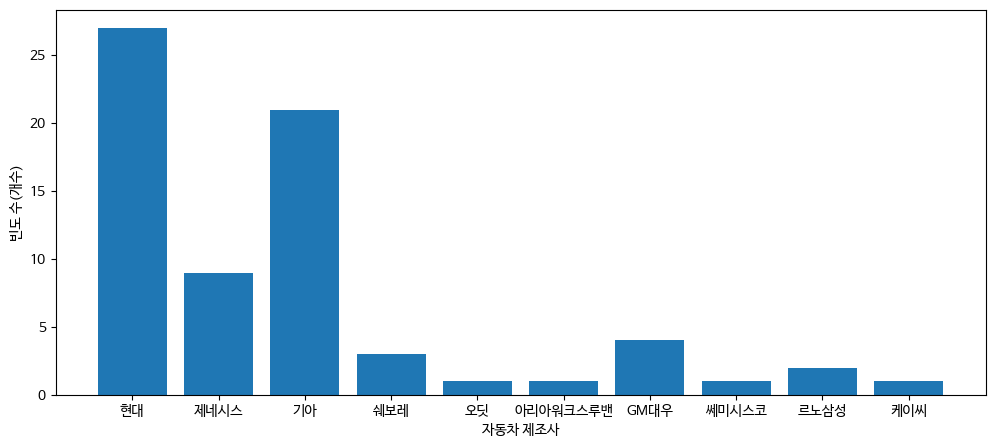

In [ ]:
import pandas as pd
path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', header=0, index_col=0)

from collections import Counter

frequency = Counter(df.maker)
print(type(frequency))
N = sum(frequency.values())    # 개수의 합
print('자동차 제조사 합계 :', N)

print('+++++제조사(maker)+++++상대도수(개수)+++++상대비율(%)+++++')
for item in frequency:
    print(item, frequency[item], round((frequency[item]/N)*100), 6) # round(value, 6) # 7번째 자릿수에서 반올림
    # 제조사, 상대도수, 상대도수비율(%) 출력

from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', header=0, index_col=0)

frequency = Counter(df.maker)

plt.figure(figsize=(12, 5))
plt.xlabel('자동차 제조사')
plt.ylabel('빈도 수(개수)')
plt.bar(frequency.keys(), frequency.values()) # x축, y축 값
plt.show()

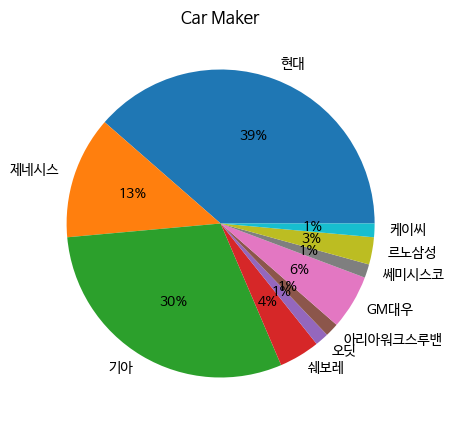

In [ ]:
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', header=0, index_col=0)

frequency = Counter(df.maker)

plt.figure(figsize=(5, 5))
plt.title('Car Maker')
plt.pie(frequency.values(), labels=frequency.keys(), autopct='%.lf%%')
plt.show()

### 2. 기술통계 분석 기법

#### (1) 기술통게량

In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', index_col=0)

dfnew = df[['km', 'price']]
print(dfnew.head())

print('*****price에 대한 주요 기술통계량*****')
print('자동차 가격에 대한 데이터 행의 개수 :', dfnew['price'].shape[0])
print('자동차 가격의 평균(만원) :', dfnew['price'].mean())
print('자동차 가격의 최솟값(만원) :', dfnew['price'].min())
print('자동차 가격의 최댓값(만원) :', dfnew['price'].max())
print('자동차 가격의 범위(최댓값-최솟값)(만원) :', dfnew['price'].max()-dfnew['price'].min())
print('자동차 가격의 중앙값(만원) :', dfnew['price'].median())
print('자동차 가격의 분산 :', dfnew['price'].var())
print('자동차 가격의 표준편차(만원) :', dfnew['price'].std())
CV = dfnew['price'].std() / dfnew['price'].mean() # 변동계수(Coefficient of Variation)
# 변동계수 : 평균을 1로 두었을 때 표준편차
print('자동차 가격의 변동계수 :', CV)

         km  price
1  260000.0    690
2   10000.0    700
3   20000.0   3350
4   90000.0   1990
5  160000.0    550
*****price에 대한 주요 기술통계량*****
자동차 가격에 대한 데이터 행의 개수 : 70
자동차 가격의 평균(만원) : 2422.157142857143
자동차 가격의 최솟값(만원) : 160
자동차 가격의 최댓값(만원) : 8500
자동차 가격의 범위(최댓값-최솟값)(만원) : 8340
자동차 가격의 중앙값(만원) : 1635.0
자동차 가격의 분산 : 4242235.264803314
자동차 가격의 표준편차(만원) : 2059.668726956671
자동차 가격의 변동계수 : 0.8503447982434015


In [ ]:
import pandas as pd

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', index_col=0)

dfnew = df[['km', 'price']]

print('*****주행거리(km)에 대한 주요 기술통계량*****')
print('자동차 주행거리(km)에 대한 데이터 행의 개수 :', len(dfnew.km))
print('자동차 주행거리(km)의 평균 :', dfnew.km.mean())
print('자동차 주행거리(km)의 최솟값 :', dfnew.km.min())
print('자동차 주행거리(km)의 최댓값 :', dfnew.km.max())
print('자동차 주행거리 범위(최댓값-최솟값)(km) :', dfnew.km.max()-dfnew.km.min())
print('자동차 주행거리(km)의 중앙값 :', dfnew.km.median())
print('자동차 주행거리(km)의 분산 :', dfnew.km.var())
print('자동차 주행거리(km)의 표준편차 :', dfnew.km.std())
CV = dfnew.km.std()/dfnew.km.mean()
print('자동차 주행거리(km)의 변동계수 :', CV)

*****주행거리(km)에 대한 주요 기술통계량*****
자동차 주행거리(km)에 대한 데이터 행의 개수 : 70
자동차 주행거리(km)의 평균 : 86267.71428571429
자동차 주행거리(km)의 최솟값 : 13.0
자동차 주행거리(km)의 최댓값 : 290000.0
자동차 주행거리 범위(최댓값-최솟값)(km) : 289987.0
자동차 주행거리(km)의 중앙값 : 80000.0
자동차 주행거리(km)의 분산 : 4776551807.424433
자동차 주행거리(km)의 표준편차 : 69112.60237774608
자동차 주행거리(km)의 변동계수 : 0.8011409940554197


In [ ]:
import pandas as pd
import numpy as np

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', index_col=0)

print('#####quantile() 함수 이용_pandas#####')
print('자동차 가격의 제1사분위수(하위 25%) :', df.price.quantile(0.25))
print('자동차 가격의 제2사분위수(하위 50%) :', df.price.quantile(0.5))
print('자동차 가격의 제3사분위수(하위 75%) :', df.price.quantile(0.75))
print('자동차 가격의 하위 5% :', df.price.quantile(0.05))
print('자동차 가격의 하위 95% :', df.price.quantile(0.95))

print()
print('#####percentile() 함수 이용_numpy#####')
print('자동차 가격의 제1사분위수(하위 25%) :', np.percentile(df.price, 25))
print('자동차 가격의 제2사분위수(하위 50%) :', np.percentile(df.price, 50))
print('자동차 가격의 제3사분위수(하위 75%) :', np.percentile(df.price, 75))
print('자동차 가격의 하위 5% :', np.percentile(df.price, 5))
print('자동차 가격의 하위 95% :', np.percentile(df.price, 95))

print()
print('#####describe() method 이용#####')
print(df.price.describe()) # type : Series 자료구조
print('자동차 가격의 제1사분위수(하위 25%) :', df.price.describe()['25%'])
print('자동차 가격의 제2사분위수(하위 50%) :', df.price.describe()['50%'])
print('자동차 가격의 제3사분위수(하위 75%) :', df.price.describe()['75%'])

#####quantile() 함수 이용_pandas#####
자동차 가격의 제1사분위수(하위 25%) : 750.0
자동차 가격의 제2사분위수(하위 50%) : 1635.0
자동차 가격의 제3사분위수(하위 75%) : 3847.5
자동차 가격의 하위 5% : 396.05
자동차 가격의 하위 95% : 5959.5

#####percentile() 함수 이용_numpy#####
자동차 가격의 제1사분위수(하위 25%) : 750.0
자동차 가격의 제2사분위수(하위 50%) : 1635.0
자동차 가격의 제3사분위수(하위 75%) : 3847.5
자동차 가격의 하위 5% : 396.05
자동차 가격의 하위 95% : 5959.5

#####describe() method 이용#####
count      70.000000
mean     2422.157143
std      2059.668727
min       160.000000
25%       750.000000
50%      1635.000000
75%      3847.500000
max      8500.000000
Name: price, dtype: float64
자동차 가격의 제1사분위수(하위 25%) : 750.0
자동차 가격의 제2사분위수(하위 50%) : 1635.0
자동차 가격의 제3사분위수(하위 75%) : 3847.5


In [ ]:
import pandas as pd
from collections import Counter

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', index_col=0)

cnt = Counter(df.price)
print('+++ 자동차 가격별 빈도수 +++')
print(cnt)

print()
cnt1 = cnt.most_common() # 내림차순 정렬
print('+++ 자동차 가격별 빈도수(내림차순 정렬) +++')
print(cnt1)

print()
cnt2 = cnt.most_common(7) # 상위 7개 추출
print('+++ 자동차 가격별 빈도수(내림차순 정렬, 상위 7개)  ', cnt2)

print()
mode = cnt.most_common(1) # 최빈값
print('+++ 자동차 가격 (최빈값, 빈도수) :', mode)
print('+++ 자동차 가격 최빈값 :', mode[0][0])
print('+++ 자동차 가격 최빈값의 빈도수 :', mode[0][1])

+++ 자동차 가격별 빈도수 +++
Counter({750: 3, 650: 3, 690: 2, 1990: 2, 5500: 2, 5000: 2, 1050: 2, 700: 1, 3350: 1, 550: 1, 3080: 1, 1960: 1, 990: 1, 1650: 1, 1790: 1, 8500: 1, 3100: 1, 6000: 1, 1200: 1, 295: 1, 600: 1, 4600: 1, 1620: 1, 4750: 1, 1350: 1, 2650: 1, 1590: 1, 5910: 1, 5600: 1, 1199: 1, 4150: 1, 2150: 1, 1740: 1, 570: 1, 300: 1, 5215: 1, 7050: 1, 4500: 1, 3400: 1, 7800: 1, 1500: 1, 2500: 1, 3980: 1, 2499: 1, 3450: 1, 1420: 1, 890: 1, 520: 1, 950: 1, 830: 1, 1495: 1, 160: 1, 489: 1, 3999: 1, 2100: 1, 1690: 1, 1150: 1, 590: 1, 5580: 1, 320: 1, 870: 1})

+++ 자동차 가격별 빈도수(내림차순 정렬) +++
[(750, 3), (650, 3), (690, 2), (1990, 2), (5500, 2), (5000, 2), (1050, 2), (700, 1), (3350, 1), (550, 1), (3080, 1), (1960, 1), (990, 1), (1650, 1), (1790, 1), (8500, 1), (3100, 1), (6000, 1), (1200, 1), (295, 1), (600, 1), (4600, 1), (1620, 1), (4750, 1), (1350, 1), (2650, 1), (1590, 1), (5910, 1), (5600, 1), (1199, 1), (4150, 1), (2150, 1), (1740, 1), (570, 1), (300, 1), (5215, 1), (7050, 1), (4500, 1), (

In [ ]:
import pandas as pd
from collections import Counter

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', index_col=0)

print('+++ 자동차 가격(price)의 기술통계량 요약 +++')
print(df.price.describe())

print()
print('+++ 자동차 주행거리(km)의 기술통계량 요약 +++')
print(df.km.describe())

print()
print('^^^^ 데이터프레임의 행과 열 변환')
print(df.T.head())

+++ 자동차 가격(price)의 기술통계량 요약 +++
count      70.000000
mean     2422.157143
std      2059.668727
min       160.000000
25%       750.000000
50%      1635.000000
75%      3847.500000
max      8500.000000
Name: price, dtype: float64

+++ 자동차 주행거리(km)의 기술통계량 요약 +++
count        70.000000
mean      86267.714286
std       69112.602378
min          13.000000
25%       30000.000000
50%       80000.000000
75%      127500.000000
max      290000.000000
Name: km, dtype: float64

^^^^ 데이터프레임의 행과 열 변환
                           1                             2   \
title  현대 제네시스 BH330 럭셔리 프라임팩  제네시스 더 올 뉴 G80 3.5 T-GDi AWD   
year              08/09(09년형)                   20/06(21년형)   
fuel                      가솔린                           가솔린   
km                   260000.0                       10000.0   
price                     690                           700   

                            3                        4   \
title  기아 K7 프리미어 3.0 GDI 시그니처  기아 더 뉴 K7 3.0 GDI 프레스티지   
year        

In [ ]:
import pandas as pd
from collections import Counter
from scipy.stats import skew, kurtosis # scipy.stats 모듈(표준편차 : 모표준편차 사용)

path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/usedcars.csv', encoding='euc-kr', index_col=0)

print('+++ scipy.stats 모듈 이용 skewness(왜도), kurtosis(첨도) +++')
print('자동차 가격의 왜도 :', skew(df.price))
print('자동차 주행거리의 왜도 :', skew(df.km))
print('자동차 가격의 첨도 :', kurtosis(df.price, fisher=True)) # fisher=True : 기준(정규분포의 첨도=0), pearson : 정규분포 첨도=3
print('자동차 주행거리의 왜도 :', kurtosis(df.km, fisher=True))

print()
print('+++ pandas 모듈 이용 skewness(왜도), kurtosis(첨도) +++') # pandas 모듈(표준편차 : 표본표준편차 사용)
print('자동차 가격의 왜도 :', df.price.skew())
print('자동차 주행거리의 왜도 :', df.km.skew())
print('자동차 가격의 첨도 :', df.price.kurt())
print('자동차 주행거리의 첨도 :', df.km.kurt())

+++ scipy.stats 모듈 이용 skewness(왜도), kurtosis(첨도) +++
자동차 가격의 왜도 : 1.0575344344602926
자동차 주행거리의 왜도 : 0.8357837246716393
자동차 가격의 첨도 : 0.17203781745385083
자동차 주행거리의 왜도 : 0.4606352248440335

+++ pandas 모듈 이용 skewness(왜도), kurtosis(첨도) +++
자동차 가격의 왜도 : 1.080834428382778
자동차 주행거리의 왜도 : 0.8541980240748542
자동차 가격의 첨도 : 0.2758589261866584
자동차 주행거리의 첨도 : 0.5861834869426965


#### (2) 탐색적 자료 분석(EDA)
- Exploratory Data Analysis

        성별     연령대   직업 주거지역    쇼핑액  이용만족도  쇼핑1월  쇼핑2월  쇼핑3월  쿠폰사용횟수 쿠폰선호도  \
고객번호                                                                         
190105  남자  45-49세  회사원  소도시  195.6      4  76.8  64.8  54.0       3     예   
190106  남자  25-29세  공무원  소도시  116.4      7  44.4  32.4  39.6       6   아니오   
190107  남자  50세 이상  자영업  중도시  183.6      4  66.0  66.0  51.6       5     예   
190108  남자  50세 이상  농어업  소도시  168.0      4  62.4  52.8  52.8       4   아니오   
190109  남자  40-44세  공무원  중도시  169.2      4  63.6  54.0  51.6       5   아니오   

        품질  가격  서비스  배송  쇼핑만족도    소득  
고객번호                                  
190105   7   7    1   4      4  4300  
190106   7   4    7   7      7  7500  
190107   4   4    3   3      6  2900  
190108   3   3    4   6      5  5300  
190109   6   4    7   4      6  4000  


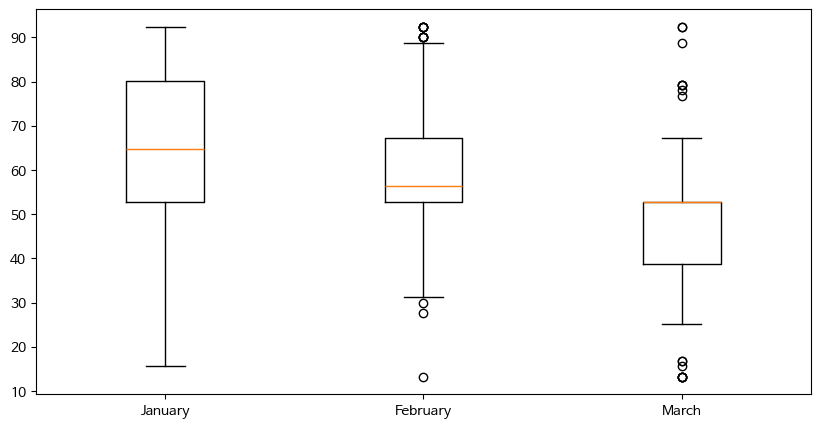

In [ ]:
# 박스플롯

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/data.csv', index_col=0)

print(df.head())
x = df.쇼핑1월
y = df.쇼핑2월
z = df.쇼핑3월

plt.figure(figsize=(10, 5))
plt.boxplot([x, y, z]) # 박스플롯 여러 개를 그리기 위해 리스트로 정의
idx = np.arange(1, 4)
labels = ['January', 'February', 'March']
plt.xticks(idx, labels) # 레이블 할당
plt.show()

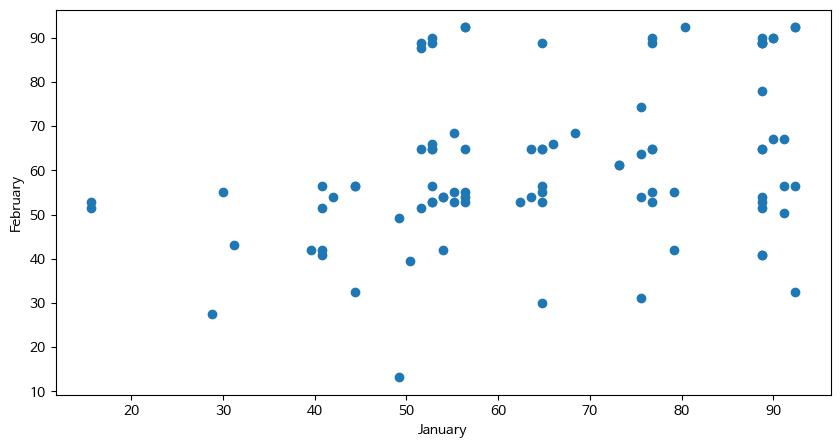

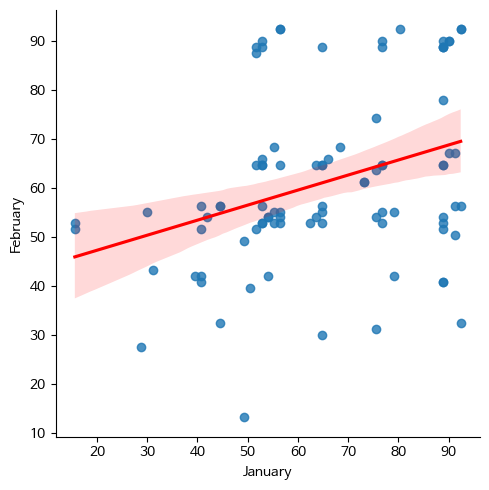

In [ ]:
# 산점도

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/data.csv', index_col=0)

x = df.쇼핑1월
y = df.쇼핑2월

dfnew = df[['쇼핑1월', '쇼핑2월']]
dfnew.rename(columns={'쇼핑1월':'January', '쇼핑2월':'February'}, inplace=True)

plt.figure(figsize=(10, 5))
plt.xlabel('January')
plt.ylabel('February')
plt.scatter(x, y)
sns.lmplot(x='January', y='February', data=dfnew, line_kws={'color':'red'})
plt.show()

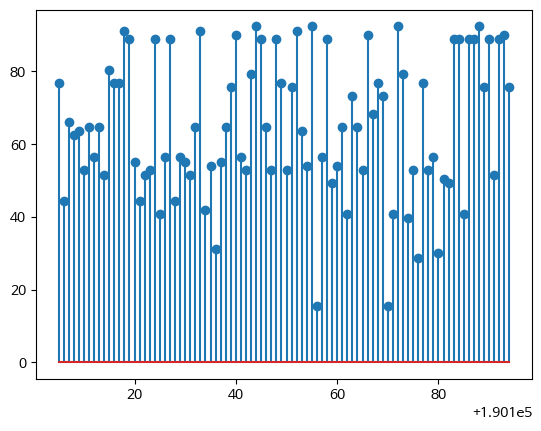

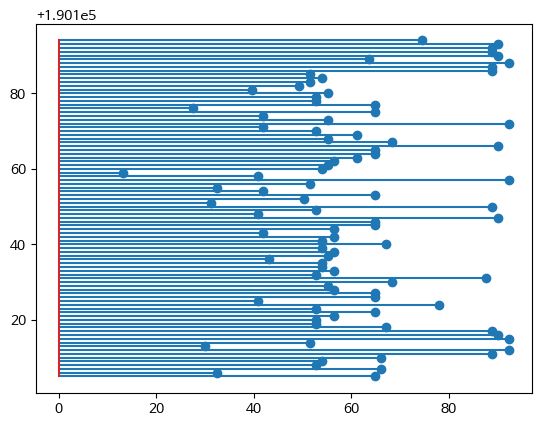

In [ ]:
# 줄기 잎 도표

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/data.csv', index_col=0)

x = df.쇼핑1월
y = df.쇼핑2월

plt.stem(x.index, x) # 줄기잎도표(인덱스, 쇼핑1월, 수직)
plt.show()

plt.stem(y.index, y, orientation='horizontal') # 줄기잎도표(인덱스, 쇼핑1월, 수평)
plt.show()

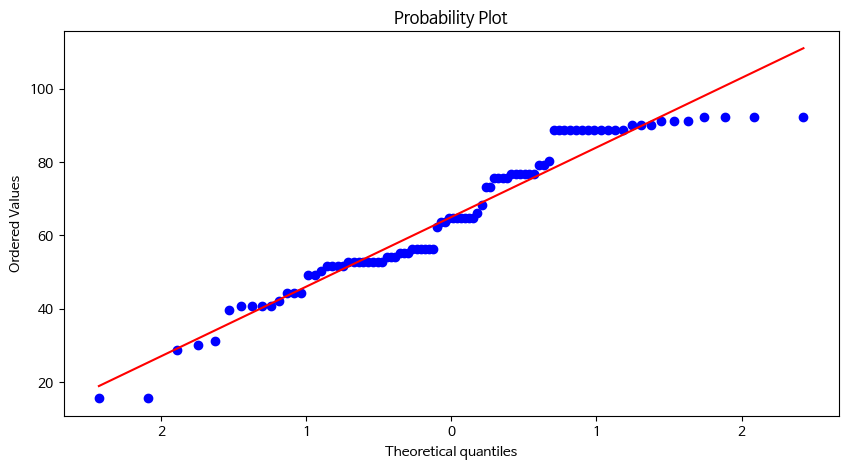

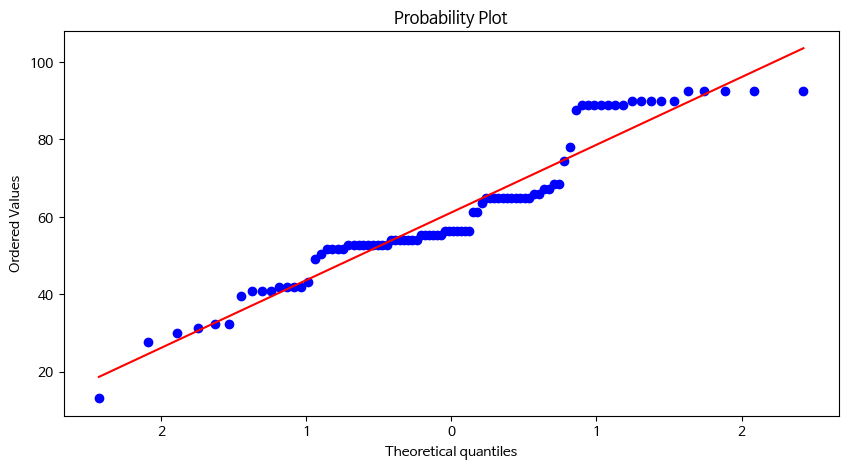

In [ ]:
# Q-Q도표(Quantile-Quantile Plot, 분위수-분위수 도표)
# 비교하고자 하는 분포의 분위수끼리 좌표 평면에 표시하여 그림
# 직선관계가 있는지 확인
## 여기서는 쇼핑액의 값이 정규분포의 값에 거의 비례하여 증가하는 것으로 보여 해당 월의 쇼핑액이 정규분포를 이루고 있는 거으로 추정됨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
path = '/content/drive/MyDrive/빅데이터분석기사'
df = pd.read_csv(path+'/workpython/data.csv', index_col=0)

x = df.쇼핑1월
y = df.쇼핑2월

plt.figure(figsize=(10, 5))
stats.probplot(x, dist=stats.norm, plot=plt) # 정규분포(dist=stats.norm 지정)를 따르는지 분석
plt.show()

plt.figure(figsize=(10, 5))
stats.probplot(y, dist=stats.norm, plot=plt)
plt.show()

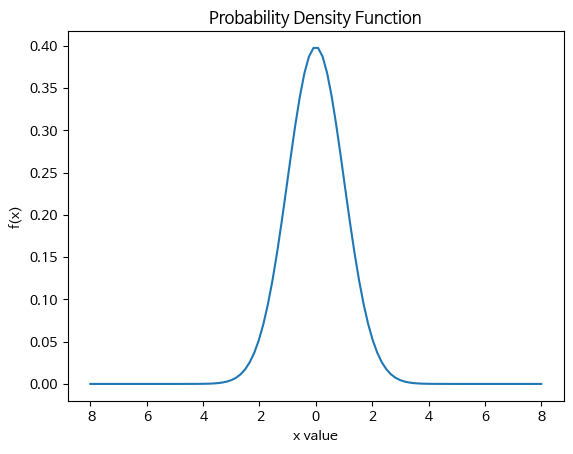

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats
import numpy as np
x = np.linspace(-8, 8, 100)
rv = sp.stats.norm() # 정규분포 zmffotm rorcp todtjd
pdf = rv.pdf(x) # 정규분포값 구하기
plt.plot(x, pdf)
plt.title('Probability Density Function')
plt.xlabel('x value')
plt.ylabel('f(x)')
plt.show()